In [8]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("/content/UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [10]:
df['PURPOSE'] = df['PURPOSE'].fillna("UNKNOWN")

# After this imputation, we are left with 1 NULL value in features - END_DATE, CATEGORY, START, and STOP. We can handle the NULL values by dropping that record
df.dropna(inplace = True)

df.isnull().sum()


,0
START_DATE,0
END_DATE,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,0


In [13]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%m/%d/%Y %H:%M', errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%m/%d/%Y %H:%M', errors='coerce')



#create new feature representing time of the ride - morning, afternoon, evening, night
df['TIME_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = pd.cut(x = df['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

#create new feature representing month of the ride
df['MONTH_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.month)
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].map(month_label)
#create new feature representing day (week) of the ride
df['DAY_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.weekday())
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['DAY_OF_THE_RIDE'] = df['DAY_OF_THE_RIDE'].map(day_label)

df['DURATION_OF_THE_RIDE'] = (df['END_DATE'] - df['START_DATE']) / pd.Timedelta(minutes=1)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NaN,NaN,NaN,NaN,NaN
1,NaT,NaT,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,NaN,NaN,NaN,NaN,NaN
3,NaT,NaT,Business,Fort Pierce,Fort Pierce,4.7,Meeting,NaN,NaN,NaN,NaN,NaN
4,NaT,NaT,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NaN,NaN,NaN,NaN,NaN


In [14]:
df.describe()

,START_DATE,END_DATE,MILES,TIME_DAY,DURATION_OF_THE_RIDE
count,734,735,1155.000000,734.000000,734.000000
mean,2016-07-25 20:39:53.623978240,2016-07-25 20:40:09.632653056,10.566840,14.528610,25.483651
min,2016-01-13 13:54:00,2016-01-13 14:07:00,0.500000,0.000000,0.000000
25%,2016-04-04 00:50:00,2016-04-07 11:39:00,2.900000,11.000000,10.000000
50%,2016-07-27 23:02:00,2016-07-27 22:26:00,6.000000,15.000000,17.000000
75%,2016-10-28 15:11:15,2016-10-28 15:47:30,10.400000,18.000000,29.000000
max,2016-12-31 22:08:00,2016-12-31 23:51:00,310.300000,23.000000,336.000000
std,NaN,NaN,21.579106,4.515382,30.844001


In [15]:
print('Min Timestamp in START_TIME is - {}'.format(df['START_DATE'].min()))
print('Max Timestamp in START_TIME is - {}'.format(df['START_DATE'].max()))


Min Timestamp in START_TIME is - 2016-01-13 13:54:00
Max Timestamp in START_TIME is - 2016-12-31 22:08:00


In [16]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].nunique()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].nunique()))
print("Total number of unique location in START - {}".format(df['START'].nunique()))
print("Total number of unique location in STOP - {}".format(df['STOP'].nunique()))


Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 11
Total number of unique location in START - 177
Total number of unique location in STOP - 188


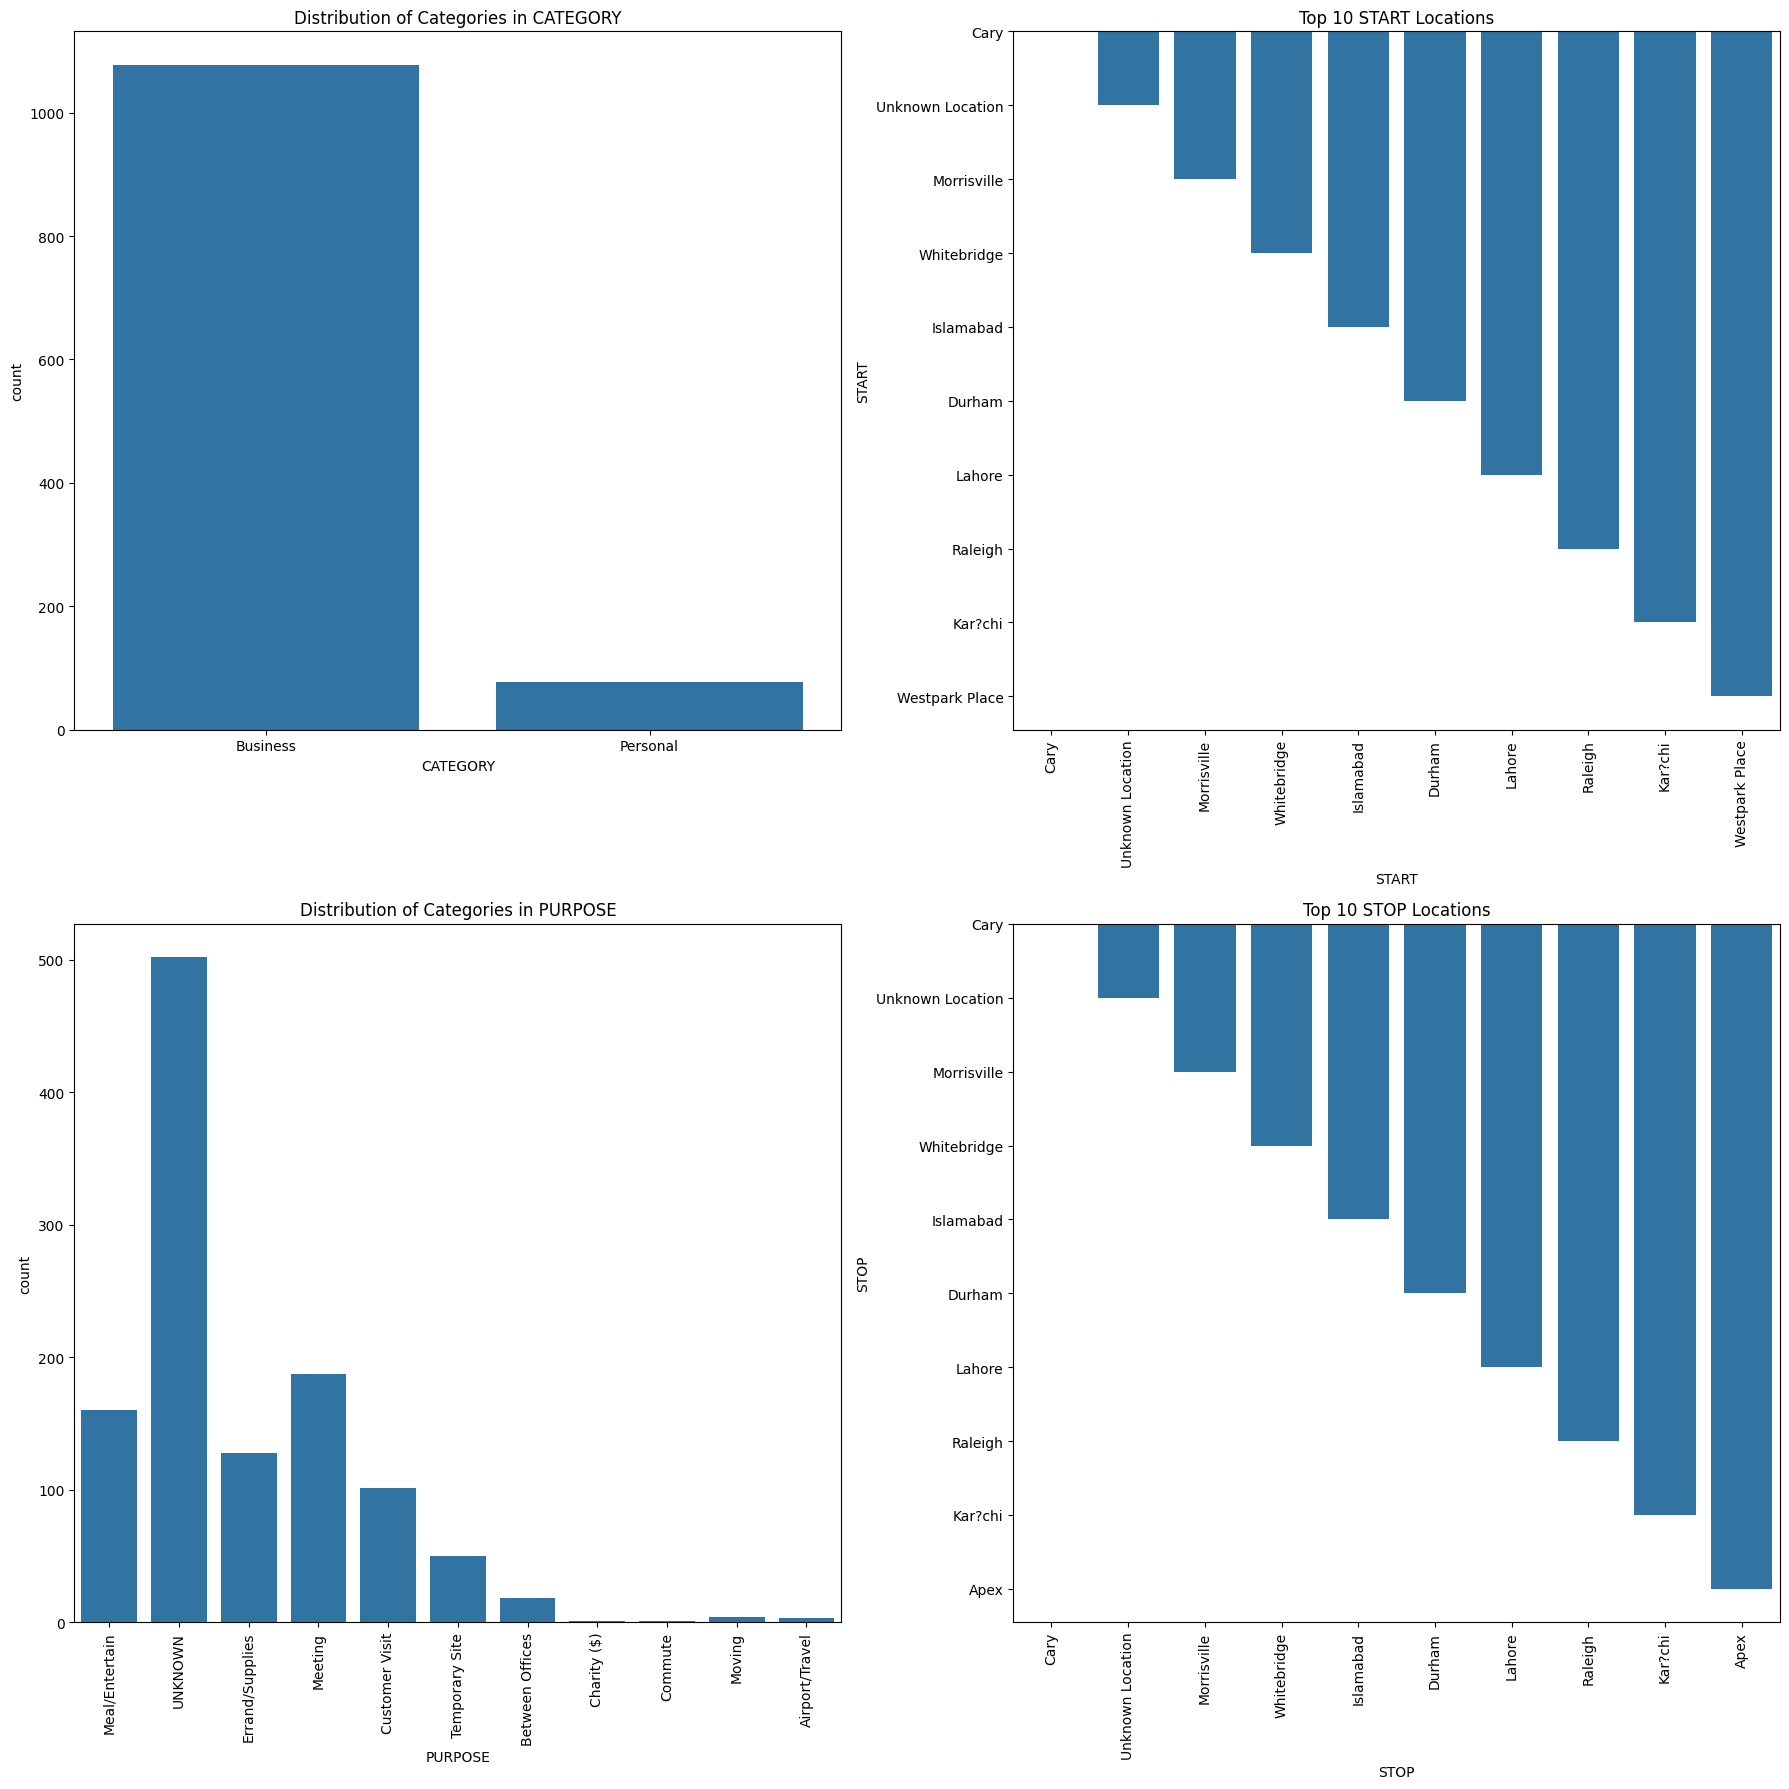

In [19]:
df['CATEGORY'] = df['CATEGORY'].astype('category')

fig, axes = plt.subplots(2, 2, figsize=(18, 18))

# Distribution of Categories in CATEGORY
sns.countplot(data=df, x='CATEGORY', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Categories in CATEGORY')

# Distribution of Categories in PURPOSE
sns.countplot(data=df, x='PURPOSE', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Categories in PURPOSE')
axes[1, 0].tick_params(axis='x', rotation=90)

# Top 10 locations for START
temp = df['START'].value_counts().nlargest(10).reset_index()
# Use temp.columns[0] to get the name of the column containing the categories
sns.barplot(data=temp, x=temp.columns[0], y='START', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 START Locations')
axes[0, 1].tick_params(axis='x', rotation=90)

# Top 10 locations for STOP
temp = df['STOP'].value_counts().nlargest(10).reset_index()
# Use temp.columns[0] to get the name of the column containing the categories
sns.barplot(data=temp, x=temp.columns[0], y='STOP', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 STOP Locations')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

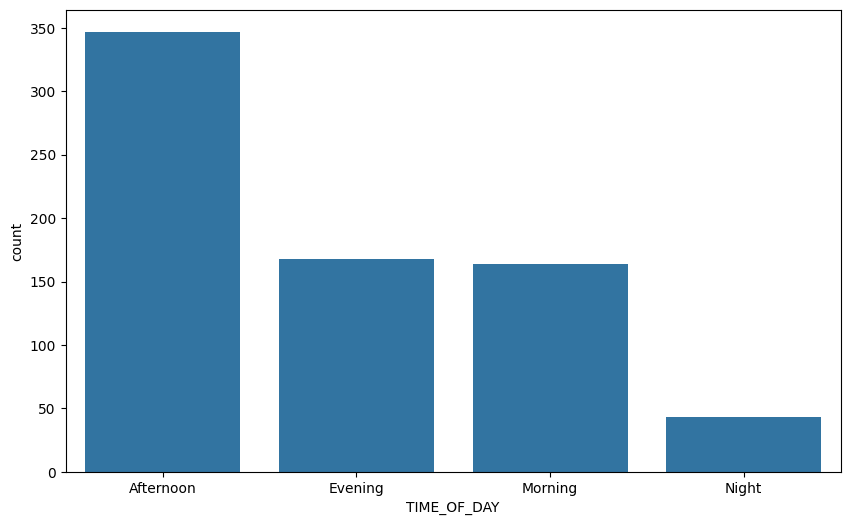

In [20]:
df['TIME_OF_DAY'] = df['TIME_OF_DAY'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIME_OF_DAY')
plt.show()


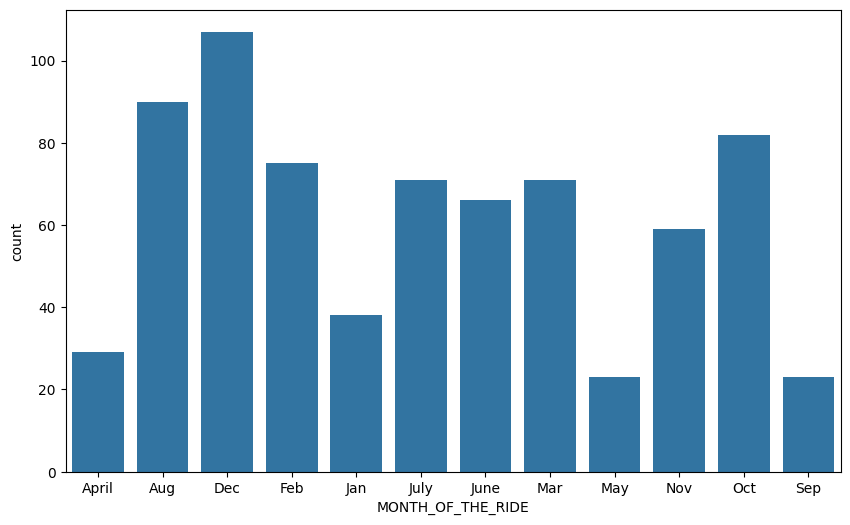

In [21]:
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MONTH_OF_THE_RIDE')
plt.show()


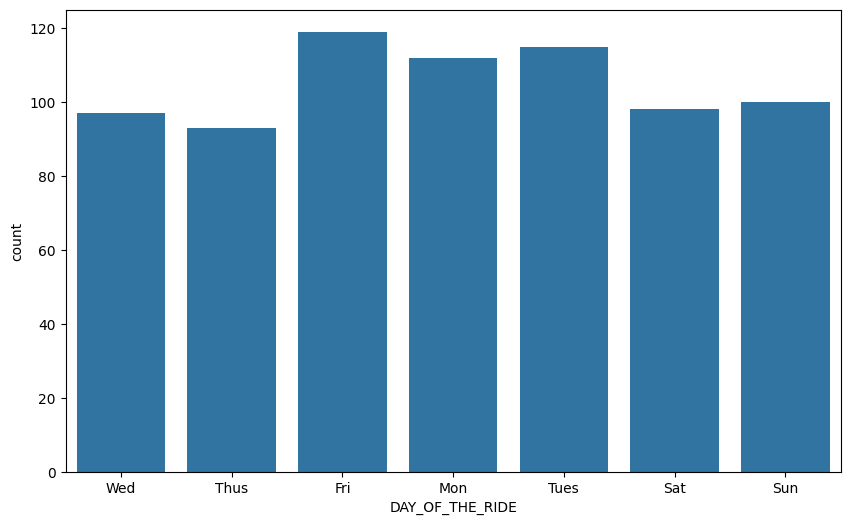

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DAY_OF_THE_RIDE')
plt.show()


<ipython-input-23-76fd047b2fd2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby('MONTH_OF_THE_RIDE')['TIME_DAY'].mean().reset_index()


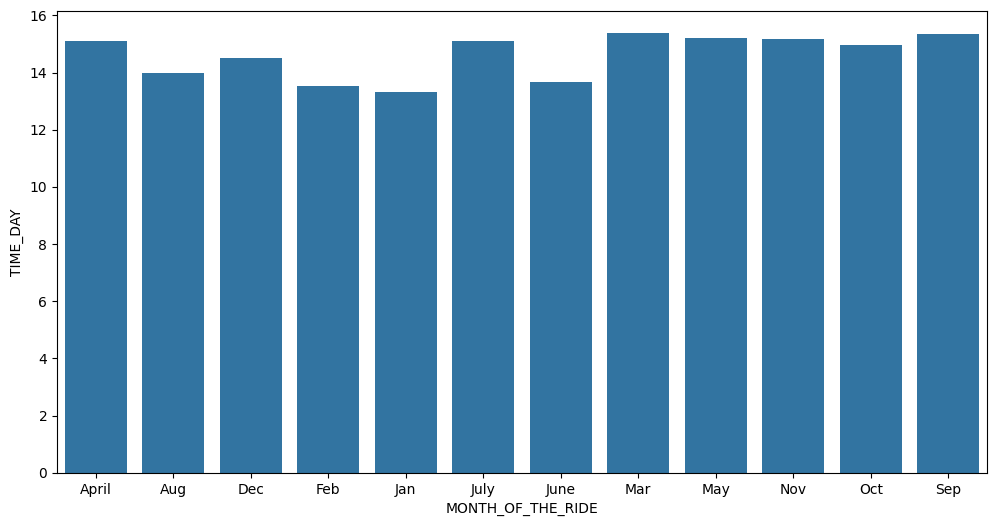

In [23]:
plt.figure(figsize=(12, 6))
temp = df.groupby('MONTH_OF_THE_RIDE')['TIME_DAY'].mean().reset_index()
sns.barplot(x='MONTH_OF_THE_RIDE', y='TIME_DAY', data=temp)
plt.show()


In [24]:
df.to_csv('cleaning_uder_data')
